> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description de la base de données

J'ai choisi l'ensemble de données des rendez-vous sans rendez-vous(noshowappointments-kagglev2-may-2016.csv) comme échantillon pour mon projet d'enquête sur les données.

> Cet ensemble de données recueille des informations sur 100 000 rendez-vous médicaux au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques sur le patient sont incluses dans chaque rangée.<br>
'ScheduledDay' nous indique le jour où le patient a fixé son rendez-vous.
'Neighborhood' indique l’emplacement de l’hôpital.<br>
'Scholarship' indique si le patient est inscrit ou non au programme d’aide sociale brésilien Bolsa Família.
<br>La dernière colonne : il est écrit « Non » si le patient s’est présenté à son rendez-vous, et « Oui » s’il ne s’est pas présenté.

### Questions Pour l'analyse
>Quels facteurs sont importants pour nous de savoir afin de prédire si un patient se présentera à son rendez-vous prévu?
<br>Pour repondre à cette question nous allons établir le raport entre la présence au rendez-vous et chaque caractéristique du client.



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt

sns.set_style('darkgrid')

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.6MB/s eta 0:00:01  7% |██▌                             | 829kB 26.0MB/s eta 0:00:01    20% |██████▌                         | 2.1MB 26.9MB/s eta 0:00:01    33% |██████████▋                     | 3.5MB 27.2MB/s eta 0:00:01    45% |██████████████▋                 | 4.8MB 27.1MB/s eta 0:00:01    70% |██████████████████████▊         | 7.4MB 25.5MB/s eta 0:00:01    94% |██████████████████████████████▏ | 9.9MB 26.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.7MB/s eta 0:00:01   23% |███████▍                        | 3.1MB 23.7MB/s eta 0:00:01    31% |██████████                      | 4.2MB 23.1MB/s eta 0:00:01    39% |████████████▌                   | 5.2MB 24.5MB/s eta 0:00:01    48% |███████████████▌                | 6.5MB 24.8MB/s eta 0:00:01    57% |██████████████████▎             | 7.7MB 22.9MB/s eta 0:00:01    66% |█████████████████████▎          | 8.9MB 23.5MB/s eta 0:00:01    75% |████████████████████████▏ 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [3]:
#chargement de la base de données
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Explorons les différentes caractéristiques de la base de données

df.shape

(110527, 14)

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe(include='O')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [11]:
#verifions si il y'a des données manquantes

df.isnull().sum().any()

False

In [12]:
#verifions si il y'a des doublures
sum(df.duplicated())

0

Bonne nouvelle ! L'ensemble de données n'a aucun doublon et aucune valeur nulle.

    Voici quelques premières remarques à noter :
    l'âge des patients est compris entre -1 (mauvaise valeur) et 115 avec une valeur moyenne de 37.
    environ 9.8% des patients ont une bourse.
    environ 19,7% des patients ont l'hypertension.
    environ 7,18% des patients sont diabétiques.
    Environ 3 % des patients sont alcooliques.
    environ 22% ont un handicap.
    environ 32% ont reçu des sms.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Nous allons apportons des correctifs suivants pour une meilleure analyse :

1. Effacer les colonnes qui ne sont pas nécessaire (les colonnes des ID)
2. Mettre les noms des colonnes en miniscules 
3. Corriger les noms de certaines colonnes
4. remplacer no-show par showed et mettre 1 pour  ceux qui sont venus au rendez-vous et 0 pour ceux qui ont manqué le rendez-vous
5. Corriger le format des dates
6. Effacer les lignesqui contiennent des erreurs

In [16]:
#Effacer les colonnes qui ne sont pas nécessaire (les colonnes des ID)

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
#2. Mettre les noms des colonnes en miniscules 
df.columns=df.columns.str.lower()
df.head(1)


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [19]:
#corrigons le nom handicap à handicap

df.rename(columns={'handcap' : 'handicap', 'hipertension':'hypertension'}, inplace=True)

df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [22]:
#Réorganisons le format des dates


def parse_date(date):
    if date == '':
        return None
    else:
        return (dt.strptime(date, "%Y-%m-%dT%H:%M:%S%fz"))
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    


def get_hour(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split(' ')[1].split(':')[0])
    
def get_day(date):
    if date == '':
        return None
    else:
        return parse_date(date).strftime('%A')
        
        
        
def get_month(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[1])
    
def get_year(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[0])
    


df['scheduledhour'] = df['scheduledday'].apply(lambda x: get_hour(x))
df['scheduleddayofweek'] = df['scheduledday'].apply(lambda x: get_day(x))
df['scheduledmonth'] = df['scheduledday'].apply(lambda x: get_month(x))
df['scheduledyear'] = df['scheduledday'].apply(lambda x: get_year(x))
df['appointmentdayofweek'] = df['appointmentday'].apply(lambda x: get_day(x))
df['appointmentmonth'] = df['appointmentday'].apply(lambda x: get_month(x))
df['appointmentyear'] = df['appointmentday'].apply(lambda x: get_year(x))


#ces fonctions je les ai trouvés sur stackoverflow, je l'ai juste modifié pour que ça reponde à mes attente

In [23]:
#verifions les changements
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,4,2016,Friday,4,2016
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,4,2016,Friday,4,2016


In [24]:
#Nous allons effacer les anciennes colonnes de dates à savoir scheduledday et appointmentday

df.drop(['scheduledday','appointmentday'], axis=1, inplace=True)

df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016


In [26]:
#Remplacer no-show par showed et mettre 1 pour ceux qui sont venus au rendez-vous et 0 pour ceux qui ont manqué le rendez-vous

df.rename(columns={'no-show' : 'showed'}, inplace=True)


In [27]:
#affectons  1 aux colonnes des patients qui sont venus au rendez-vous et 0 pour ceux qui ont manqué le rendez-vous

df['showed'] = df['showed'].apply(lambda x: 1 if x=='No' else 0 )

In [28]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,Friday,4,2016,Friday,4,2016
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,Friday,4,2016,Friday,4,2016
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,Friday,4,2016,Friday,4,2016
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,Friday,4,2016,Friday,4,2016
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,Friday,4,2016,Friday,4,2016


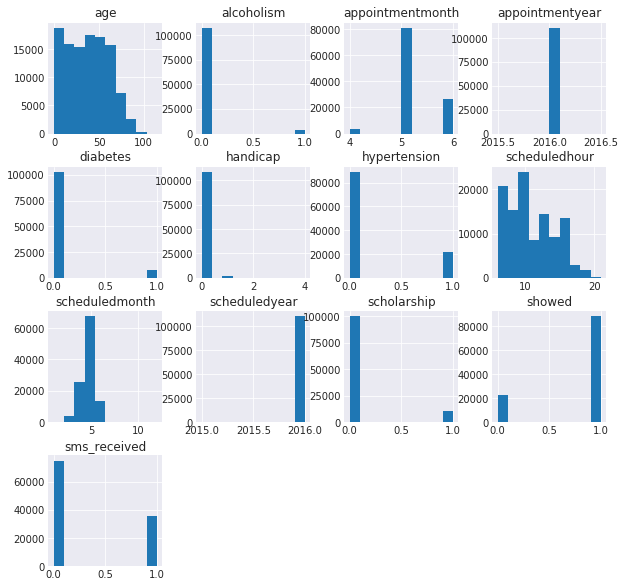

In [32]:
#Affichons une vue d'ensemble de la base de donnée avec des histogrammes

df.hist(figsize=(10,10));

In [33]:
#Effacer les lignesqui contiennent des erreurs
#On avait vu plus haut que certaines lignes ont la valeur -1 à la colonne âge

df.drop(df[df['age']==-1].index,inplace=True)

In [34]:
df[df['age']==-1]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear


In [35]:
#Nous avons effacer les lignes avec l'âge = -1 et si il s'avère qu'il y'ait d'autres valeur, verifions cela
df[df['age']<0]


#superr, continuons


,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,scheduledhour,scheduleddayofweek,scheduledmonth,scheduledyear,appointmentdayofweek,appointmentmonth,appointmentyear


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Quel est le pourcentage de présence(pr) et de non présence(np)?)

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

pr=df['showed']==True
np=df['showed']==False

vue=pr.mean()
non_vue=np.mean()




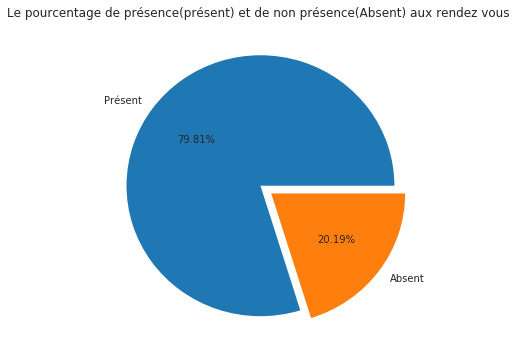

In [63]:
plt.figure(figsize=(6,6))
explode = (0, 0.1)
plt.pie([vue,non_vue],labels=['Présent','Absent'],autopct="%0.2f%%",explode=explode);

plt.title("Le pourcentage de présence(présent) et de non présence(Absent) aux rendez vous ");

Nous remarquons ici que 79.81 % des Patients vont au rendez-vous et 20.19% des patients ne vont pas aux rendez-vous

### Research Question 2  (Qui va le plus chez le docteur entre l'homme et la femme?)

In [65]:
df.gender.value_counts()


F    71839
M    38687
Name: gender, dtype: int64

In [66]:
#proportion de femme
prop_femme=df.gender.value_counts()[0]/df.shape[0]
prop_femme

0.6499737618297957

In [67]:
#proportion d'hommes
prop_homme=df.gender.value_counts()[1]/df.shape[0]
prop_homme

0.3500262381702043

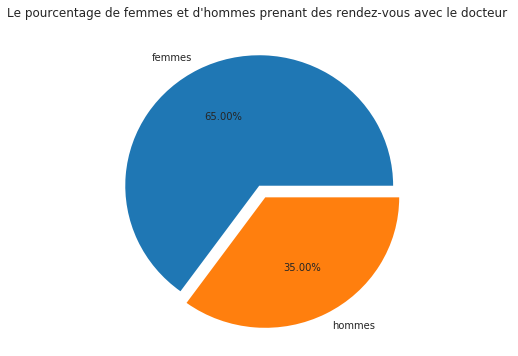

In [69]:
plt.figure(figsize=(6,6))
explode = (0, 0.1)
plt.pie([prop_femme,prop_homme],labels=['femmes','hommes'],autopct="%0.2f%%",explode=explode);

plt.title("Le pourcentage de femmes et d'hommes prenant des rendez-vous avec le docteur ");

Nous avons ici 65% de femmes et 35% d'hommes qui prennent des rendez-vous

Interessant !

verifions maintenant qui va  aux rendez-vous ahah

# Qui des femmes où des hommes ont le plus repondus présent aux rendez-vous ? 

In [70]:
# groupons par genre et verifions

df.groupby('gender')['showed'].mean()

gender
F    0.796851
M    0.800321
Name: showed, dtype: float64

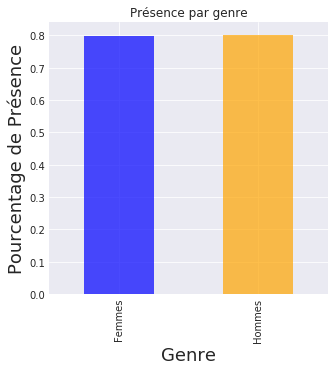

In [74]:
#Affichons le graphique pour mieux visualiser

df.groupby('gender')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange'], figsize=(5,5));

plt.xticks([0, 1], ['Femmes', 'Hommes'])
plt.ylabel('Pourcentage de Présence', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.title('Présence par genre');

Les hommes et les femmes se sont présenté a des proportions quasi égales de 80%

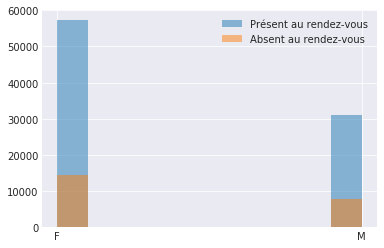

In [76]:
df.gender[pr].hist(alpha=0.5, label = 'Présent au rendez-vous')
df.gender[np].hist(alpha=0.5, label = 'Absent au rendez-vous');
plt.legend();

On voit qu'il y'a eu plus de femmes qui étaient aux rendez-vous, normal vu qu'ils y'avaient plus de femmes qui ont pris des rendez-vous.

80% de 65% est supérieur à 80% de 35%.

# Quelle est la maladie la plus fréquente chez les personnes en rendez-vous

In [79]:
#proposrtions hypertension
hyper_prop = df.hypertension.mean()*100
hyper_prop

19.724770642201836

In [102]:
df.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [80]:
#proposrtions diabète
diabetes_prop = df.diabetes.mean()*100
diabetes_prop

7.186544342507645

In [81]:
#proposrtions Alcoolisme
alcoholism_prop = df.alcoholism.mean()*100
alcoholism_prop

3.040008685739102

In [82]:
handicap_prop = df.handicap.mean()*100
handicap_prop


2.224815880426325

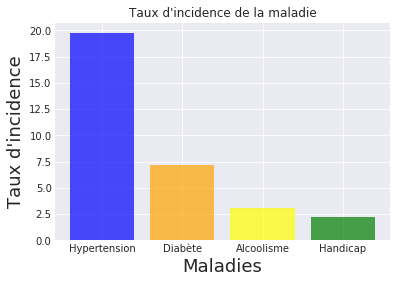

In [104]:
colors = ['blue', 'orange', 'yellow', 'green']
locations = [1, 2, 3, 4]
heights = [hyper_prop, diabetes_prop, alcoholism_prop, handicap_prop]
labels = ['Hypertension', 'Diabète', 'Alcoolisme', 'Handicap']

plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title("Taux d'incidence de la maladie")
plt.xlabel('Maladies', fontsize=18)
plt.ylabel("Taux d'incidence" ,fontsize=18)
plt.xticks(locations, labels);

Parmi les personnes prenant rendez-vous, l'hypertension est la pathologie la plus fréquente avec un ratio de 20%

# La maladie affecte-t-elle le taux de rendez-vous ?

In [116]:
#Hypertension

df.groupby('hypertension')['showed'].mean()

hypertension
0    0.790961
1    0.826980
Name: showed, dtype: float64

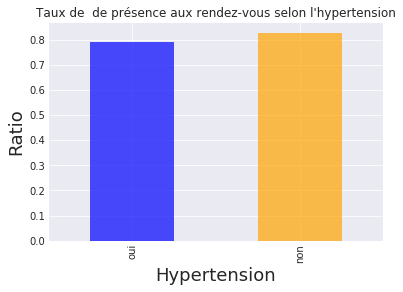

In [137]:

df.groupby('hypertension')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);


plt.xticks([0, 1], ['oui', 'non'])
plt.title("Taux de  de présence aux rendez-vous selon l'hypertension");
plt.ylabel('Ratio', fontsize=18)
plt.xlabel('Hypertension', fontsize=18);

In [123]:
#Diabète
df.groupby('diabetes')['showed'].mean()

diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64

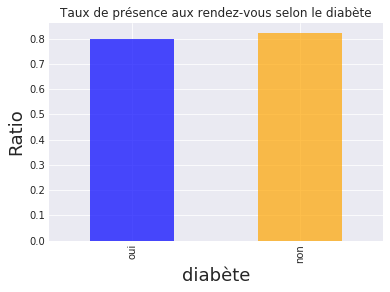

In [136]:

df.groupby('diabetes')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);


plt.xticks([0, 1], ['oui', 'non'])
plt.title("Taux de présence aux rendez-vous selon le diabète");
plt.ylabel('Ratio', fontsize=18)
plt.xlabel('diabète', fontsize=18);

In [127]:
#Alcoolisme
df.groupby('alcoholism')['showed'].mean()

diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64

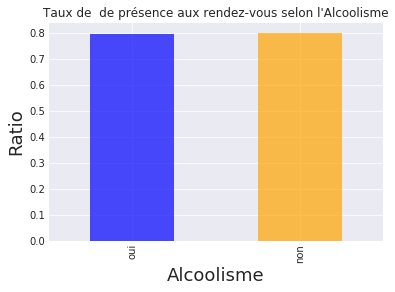

In [135]:
df.groupby('alcoholism')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);


plt.xticks([0, 1], ['oui', 'non'])
plt.title("Taux de  de présence aux rendez-vous selon l'Alcoolisme");
plt.ylabel('Ratio', fontsize=18)
plt.xlabel('Alcoolisme', fontsize=18);

In [133]:
#handicap

df.groupby('handicap')['showed'].mean()

handicap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: showed, dtype: float64

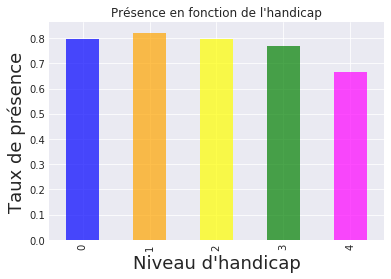

In [152]:
df.groupby('handicap')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange', 'yellow', 'green', 'magenta']);



plt.title("Présence en fonction de l'handicap");
plt.ylabel('Taux de présence', fontsize=18)
plt.xlabel("Niveau d'handicap", fontsize=18);

# La bourse est-elle associée à un taux de présence plus élevé ?

In [138]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [139]:
noscholar_prop = df.scholarship.value_counts()[0] / df.shape[0]
noscholar_prop

0.9017335287624632

In [140]:
scholar_prop = df.scholarship.value_counts()[1] / df.shape[0]
scholar_prop

0.09826647123753687

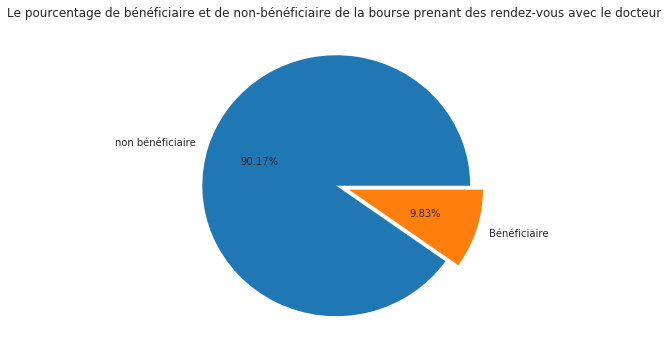

In [143]:
plt.figure(figsize=(6,6))
explode = (0, 0.1)
plt.pie([noscholar_prop,scholar_prop],labels=['non bénéficiaire','Bénéficiaire'],autopct="%0.2f%%",explode=explode);

plt.title("Le pourcentage de bénéficiaire et de non-bénéficiaire de la bourse prenant des rendez-vous avec le docteur ");

In [144]:
df.groupby('scholarship').showed.mean()

scholarship
0    0.801926
1    0.762637
Name: showed, dtype: float64

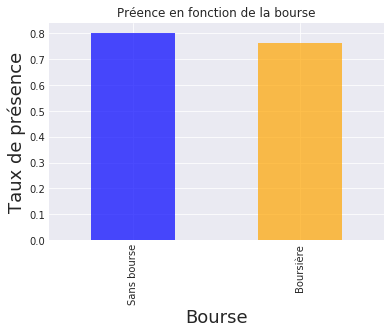

In [153]:
df.groupby('scholarship')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Sans bourse', 'Boursière'])
plt.title('Préence en fonction de la bourse')
plt.xlabel('Bourse', fontsize=18)
plt.ylabel('Taux de présence', fontsize=18);

Les personnes sans bourse sont plus susceptibles de se présenter au rendez-vous. Ils ont un taux de présence de 80% et les personnes boursières ont un taux d'exposition de 76%

# Quel est le genre qui bénéficie le plus de la bourse

In [154]:


df.groupby('gender').scholarship.mean()



gender
F    0.123234
M    0.051904
Name: scholarship, dtype: float64

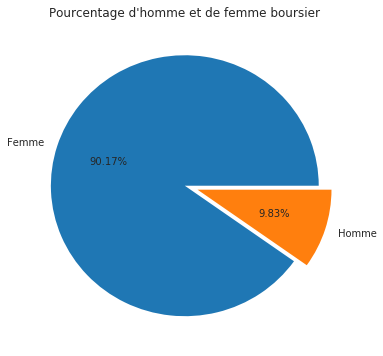

In [158]:
plt.figure(figsize=(6,6))
explode = (0, 0.1)
explode=(0,0.1)
plt.pie([noscholar_prop,scholar_prop],labels=['Femme','Homme'],autopct="%0.2f%%",explode=explode);

plt.title("Pourcentage d'homme et de femme boursier");

90.17% des boursiers sont des femmes (cette valeur ne réprésente que 12.3% des femmes donc on ne peut pas dire que le nombre élévé de femmes prenant des rendez-vous est dû à la bourse.)

Il y'a largement plus de femmes qui bénéficie de la bourse que d'Hommes

# Quelle est la répartition de la présence par tranche d'âge ?

In [159]:
df[['showed', 'age']].describe()

,showed,age
count,110526.000000,110526.000000
mean,0.798066,37.089219
std,0.401445,23.110026
min,0.000000,0.000000
25%,1.000000,18.000000
50%,1.000000,37.000000
75%,1.000000,55.000000
max,1.000000,115.000000


In [161]:
#Classons les patients par tranches d'âges
bin_edges = [-1, 15, 25, 65, 115]
bin_names = ['Enfants', 'Adolescents', 'Adultes', 'Aînés']
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [162]:
#verifions si tout les patients ont été classé

df.shape[0] == df.query('age_group == "Enfants"').age.count() + df.query('age_group == "Adolescents"').age.count() + df.query('age_group == "Adultes"').age.count()+ df.query('age_group == "Aînés"').age.count()

True

In [163]:
#présence en fonction du groupe d'âge

age_group_show_means = df.groupby('age_group')['showed'].mean()
age_group_show_means

age_group
Enfants        0.785516
Adolescents    0.747364
Adultes        0.804950
Aînés          0.844673
Name: showed, dtype: float64

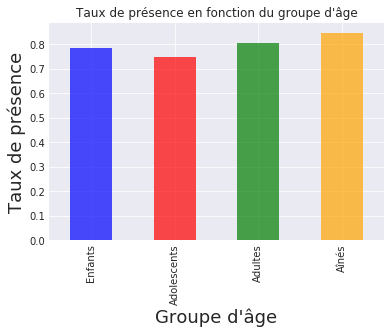

In [167]:
df.groupby('age_group')['showed'].mean().plot(kind='bar', alpha=.7,color=['blue','red','green','orange']);

# title and labels
plt.xticks([0, 1, 2, 3] , ['Enfants', 'Adolescents', 'Adultes', 'Aînés'])
plt.title("Taux de présence en fonction du groupe d'âge");
plt.ylabel('Taux de présence', fontsize=18)
plt.xlabel("Groupe d'âge", fontsize=18);

On voit que les adolescents(15 à 25 ans) sont les plus suceptibles de manqué leurs rendez-vous

# L'impact des messages envoyés

In [170]:
#voyons la proportions qui a reçu un message
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [173]:
sms_prop = df.sms_received.value_counts()[1] / df.shape[0]
sms_prop

0.3210285362720084

In [172]:
no_sms_prop = df.sms_received.value_counts()[0] / df.shape[0]
no_sms_prop

0.6789714637279916

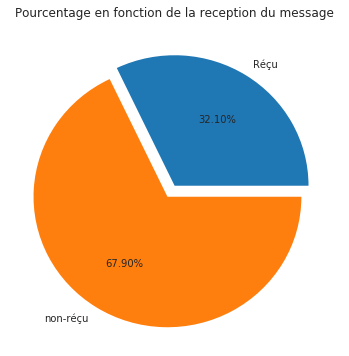

In [174]:
plt.figure(figsize=(6,6))
explode = (0, 0.1)
explode=(0,0.1)
plt.pie([sms_prop,no_sms_prop],labels=['Réçu','non-réçu'],autopct="%0.2f%%",explode=explode);

plt.title("Pourcentage en fonction de la reception du message");

seulement 32,10% des patients ont réçu un message

In [175]:
#Voyons maintenant la présence

df.groupby('sms_received')['showed'].mean()

sms_received
0    0.832965
1    0.724255
Name: showed, dtype: float64

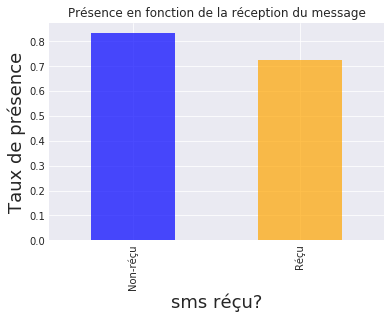

In [176]:
df.groupby('sms_received')['showed'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Non-réçu', 'Réçu'])
plt.title('Présence en fonction de la réception du message');
plt.xlabel('sms réçu?', fontsize=18)
plt.ylabel('Taux de présence', fontsize=18);

Les personnes qui n'ont pas reçu de SMS sont plus susceptibles de se présenter au rendez-vous, elles ont un taux de présence de 83% et les personnes qui ont reçu des SMS ont un taux de présence de 72%.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

Conclusion :

- La majorité des gens (79,81 %) se présentent habituellement au rendez-vous prévu.

- Les femmes vont plus souvent chez le médecin que les hommes, 65 % des femmes mais 35 % des hommes.

- En ce qui concerne le sexe, il n'y a pas de différence dans le taux de présence au rendez-vous.

- Parmi les personnes prenant rendez-vous, l'hypertension est la maladie la plus fréquente, près de 20% sont touchés par l'hypertension.

- Le type de maladie n'a pas vraiment influence sur la présence ou l'absence d'un patient.

- Les adolescents(15 à 25 ans) sont les plus suceptibles de manqué leurs rendez-vous avec un taux de présence de 74,74%.

- La réception de SMS semble inéfficace pour améliorer le taux de présence aux rendez-vous médicaux.

- Parmi les personnes en rendez-vous,  9,83 % ont une bourse Bolsa. Et les personnes sans bourse ont un taux de présence légèrement plus élevé aux rendez-vous médicaux.

- 90.17% des boursiers sont des femmes (cette valeur ne réprésente que 12.3% des femmes donc on ne peut pas dire que le nombre élévé de femmes prenant des rendez-vous est dû à la bourse.)



Limites:

- La base  de données ne contient pas suffisamment de données pour toute l'année - seuls trois mois sont disponibles.

- La base  de données contient des lignes avec les mois de planification 11 et 12 en 2015, alors que tous les rendez-vous sont en 2016.

- Aucune information disponible concernant l'heure du rendez-vous.

- Impossible de montrer de fortes corrélations entre les facteurs puisque la plupart de nos données sont catégorisées.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])